# Image Classification 

* Dataset: [Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Images
* **Images**: Matrix of numbers (pixels). Each pixel holds a number we will work with
* **Images with colors**: Multi channel. 3 values needed.
* **Greyscale images**: Single channel images. 1 value needed.
* Every image is 28x28 pixels.

# 4 values

* **List of images**: (1, 2, 3, 4)
* **Value 1**: Number of images in the list
* **Value 2,3**: Height and width of the image
* **Value 4**: Number of channels in the image

In [2]:
# Get data
data = 'mnist.csv'
df = pd.read_csv(data)
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Features
X = df[df.columns[1:]]

# Labels
y = df['label']

In [4]:
# Shape of the data
df.shape

(10000, 785)

In [5]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


## Let us scale our data as we can see the variance of the mean.
Let's scale the pictures so they are at a value between 0 and 1.

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fit_scaler = scaler.fit(X)
scaled_pixels = scaler.transform(X)

## Helper function to display images

In [7]:
# Helper function
def display_image(features, image_label):

    # Labels
    label_names = {
        0: 'T-shirt',
        1: 'Trouser',
        2: 'Pullover',
        3: 'Dress',
        4: 'Coat',
        5: 'Sandal',
        6: 'Shirt',
        7: 'Sneaker',
        8: 'Bag',
        9: 'Ankle boot'
    }
    
    print('This is a', label_names[image_label].lower())
    plt.imshow(features.reshape(28,28))

This is a pullover


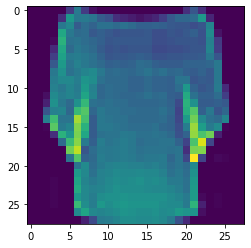

In [8]:
# Test to display image
display_image(X.loc[5].values, y.loc[5])

In [9]:
#X = X/255
#X.head()

## Split our data
We will go ahead and split our data into test and train sets.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

## Fit model

In [11]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='sag', multi_class='auto', max_iter=1000).fit(X_train, y_train)

## Evaluate

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
predict = model.predict(X_test)
accuracy = accuracy_score(y_test, predict, normalize=True)
print(f'Accuracy of model: {accuracy*100}%')

# Comparision